# Project 1
- **Team Members**: Chika Ozodiegwu, Kelsey Wyatt, Libardo Lambrano, Kurt Pessa

![](Images/florida_covid19_data.jpg)

### Data set used:
* https://open-fdoh.hub.arcgis.com/datasets/florida-covid19-case-line-data


##### Dependencies

In [40]:
import step1_raw_data_collection as step1
import step2_data_processing_and_cleaning as step2

import requests
import pandas as pd
import io
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import JSON
from matplotlib.colors import ListedColormap

# Process of Data Analysis
![](Images/data_process.png)
## Raw Data Collection
-----

In [2]:
df = pd.read_csv("Resources/Florida_COVID19_Case_Line_Data_new.csv")
df.head(3)

,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Origin,EDvisit,Hospitalized,Died,Case_,Contact,Case1,EventDate,ChartDate,ObjectId
0,Hillsborough,21.0,15-24 years,Male,FL resident,Unknown,NaN,NaN,NaN,NaN,Yes,Yes,2020/07/15 05:00:00+00,2020/07/15 01:04:23+00,2020/07/15 05:00:00+00,90
1,Palm Beach,65.0,65-74 years,Male,FL resident,Unknown,NaN,NaN,NaN,NaN,Yes,Yes,2020/07/15 05:00:00+00,2020/07/15 19:56:31+00,2020/07/15 05:00:00+00,279
2,Hendry,23.0,15-24 years,Female,FL resident,Unknown,NaN,NaN,NaN,NaN,Yes,Yes,2020/07/15 05:00:00+00,2020/07/15 15:03:33+00,2020/07/15 05:00:00+00,339


## Data Processing & Data Cleaning
-----

##### Single Group

In [5]:
#df = step2.get_hospitalized_data()
#df = step2.get_df_with_datetime_and_formatted_column()
#df = step2.get_hospitalizations_by_casedatetime()

#group_name = "Gender"
group_name = "Age_group"
#group_name = "Travel_related"
#group_name = "Jurisdiction"
#group_name = "County"

df = step2.get_group(group_name)

df

,Age_group,Hospitalized
0,0-4 years,100
1,15-24 years,508
2,25-34 years,1313
3,35-44 years,1947
4,45-54 years,2788
5,5-14 years,76
6,55-64 years,3699
7,65-74 years,4037
8,75-84 years,3716
9,85+ years,2785


##### Two groups: Before and After Opening

In [15]:
df1, df2 = step2.get_groups_before_and_after_opening_date(opening_date = dt.datetime(2020,5,4), day_delta = 30)
#df1, df2 = step2.get_groups_by_casedatetime()

group_name = "Gender"
#group_name = "Age_group"
#group_name = "Travel_related"
#group_name = "Jurisdiction"
#group_name = "County"

df1,df2 = step2.get_groups(group_name)

#df1

### Before Opening

In [13]:
df1

,Gender,Hospitalized
0,Female,2513
1,Male,2745


### After Opening

In [14]:
df2

,Gender,Hospitalized
0,Female,1772
1,Male,1717


In [3]:
#Clean dataframe

new_csv_data_df = df[['ObjectId', "County",'Age',"Age_group", "Gender", "Jurisdiction", "Travel_related", "Hospitalized","Case1"]]

#Split Date and time into separate columns

new_csv_data_df['Date'] = pd.to_datetime(new_csv_data_df['Case1']).dt.date
new_csv_data_df['Time'] = pd.to_datetime(new_csv_data_df['Case1']).dt.time


#create new dataframe with new date date

new_csv_data_df1 = new_csv_data_df[['ObjectId', "County",'Age',"Age_group", "Gender", "Jurisdiction", "Travel_related", "Hospitalized","Date"]]
new_csv_data_df1.head()

/Users/kelseywyatt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kelseywyatt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ObjectId,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Hospitalized,Date
0,90,Hillsborough,21.0,15-24 years,Male,FL resident,Unknown,NaN,2020-07-15
1,279,Palm Beach,65.0,65-74 years,Male,FL resident,Unknown,NaN,2020-07-15
2,339,Hendry,23.0,15-24 years,Female,FL resident,Unknown,NaN,2020-07-15
3,1606,Leon,19.0,15-24 years,Male,FL resident,Unknown,NaN,2020-07-15
4,1873,Santa Rosa,21.0,15-24 years,Female,FL resident,No,NO,2020-07-15


In [4]:
#new_csv_data_df.to_csv(new_csv_data_df, 'new_cleaned_data.csv')

new_csv_data_df.to_csv ("new_covid_dataframe.csv") # index = False, header=True)

# Research Question to Answer:
#### “Has hospitalizations (#) in Florida changed since reopening?"

### Steps for Hypothesis Testing


#### 1. Identify
- **Populations** (divide Hospitalization data into two groups of data):
    1. Prior to opening
    2. After opening  
* Decide on the **date**:
    * May 4th - restaurants opening to 25% capacity

#### 2. State the hypotheses
- **H0**: There is no change in hospitalizations after Florida has reopened
- **H1**: There is a change in hospitalizations after Florida has reopened

#### 3. Interesting figures developed during exploration
- Considered 14 day COVID-19 incubation period

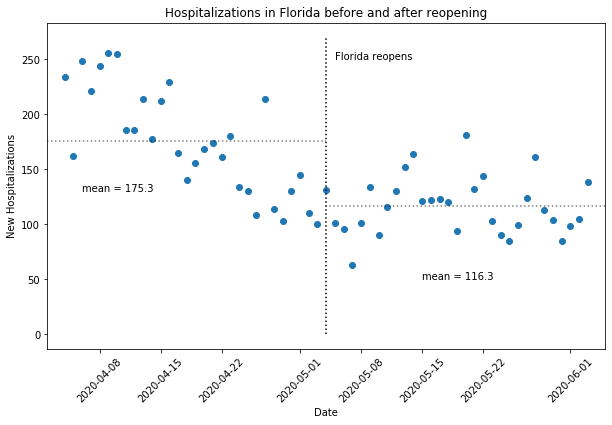

In [5]:
df = step2.get_hospitalizations_by_casedatetime()

filt1 = (df['CaseDateTime'] >= (dt.datetime(2020,5,4)-dt.timedelta(days=30)))
filt2 = (df['CaseDateTime'] <= (dt.datetime(2020,5,4)+dt.timedelta(days=30)))
filt = (filt1 & filt2)
df = df[filt]
plt.figure(figsize=(10,6))
plt.scatter(df['CaseDateTime'],df["Hospitalized"])
plt.xlim((dt.datetime(2020,5,4)-dt.timedelta(days=32)),(dt.datetime(2020,5,4)+dt.timedelta(days=32)))
plt.vlines(dt.datetime(2020,5,4), 0, 270, linestyles ="dotted", colors ="k") 
plt.annotate("Florida reopens", (dt.datetime(2020,5,5),250))
plt.title("Hospitalizations in Florida before and after reopening")
plt.ylabel("New Hospitalizations")
plt.xlabel("Date")
plt.hlines(175.3,dt.datetime(2020,5,4)-dt.timedelta(days=32),dt.datetime(2020,5,4), linestyles="dotted",colors='k',alpha=0.5)
plt.annotate("mean = 175.3", (dt.datetime(2020,4,6),130))
plt.hlines(116.3,dt.datetime(2020,5,4)+dt.timedelta(days=32),dt.datetime(2020,5,4), linestyles="dotted",colors='k',alpha=0.5)
plt.annotate("mean = 116.3", (dt.datetime(2020,5,15),50))
plt.xticks(rotation=45)
plt.savefig("Images/hospitalizations_before_and_after_reopening.png")
plt.show()

- Population means, standard deviations

In [7]:
df1, df2 = step2.get_groups(group_name = "CaseDateTime", opening_date = dt.datetime(2020,5,4), day_delta = 30, opening_day_shift = 0)

In [8]:
sample1 = df1['Hospitalized']
sample2 = df2['Hospitalized']
pd.DataFrame({
    "Before Opening:": sample1.describe(),
    "After Opening": sample2.describe()
}).style.format("{:.1f}")

,Before Opening:,After Opening
count,30.0,30.0
mean,175.3,116.3
std,48.6,26.6
min,100.0,63.0
25%,135.5,98.2
50%,171.0,114.5
75%,214.0,131.5
max,256.0,181.0


#### 4. Critical values
- Our hypothesis is nondirectional so our hypothesis test is **two-tailed**
- **Test used**: T-Test
- **p-value** = 0.00000026

In [11]:
statistic, pvalue = stats.ttest_ind_from_stats(sample1.mean(),sample1.std(),sample1.size,sample2.mean(),sample2.std(),sample2.size)
print(f"p-value: {pvalue:.8f}")

p-value: 0.00000026


#### 5. Distribution

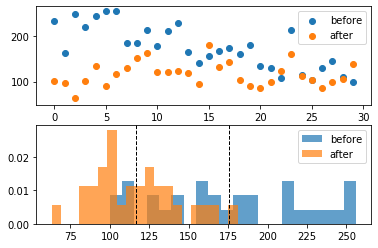

In [12]:
# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(sample1)), sample1, label="before")
plt.scatter(range(len(sample2)), sample2, label="after")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(sample1, 20, density=True, alpha=0.7, label="before")
plt.hist(sample2, 20, density=True, alpha=0.7, label="after")
plt.axvline(sample1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sample2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
plt.savefig("Images/before_and_after_histogram.png")
plt.show()

#### 6. Decide

- We are able to reject the null hypothesis that there was no change.  With the data set we analyzed, there was a significant change from before to after reopening in Florida.

## Data Analysis and Visualization

In [15]:
#Calculate total number of cases 
Total_covid_cases = new_csv_data_df["ObjectId"].nunique()
Total_covid_cases = pd.DataFrame({"Total Number of Cases": [Total_covid_cases]})
Total_covid_cases

,Total Number of Cases
0,315775


In [16]:
#Total number of cases per county
total_cases_county = new_csv_data_df.groupby(by="County").count().reset_index().loc[:,["County","Case1"]]
total_cases_county.rename(columns={"County": "County", "Case1": "Total Cases"})

,County,Total Cases
0,Alachua,2397
1,Baker,202
2,Bay,1602
3,Bradford,173
4,Brevard,3804
...,...,...
63,Unknown,372
64,Volusia,4572
65,Wakulla,223
66,Walton,693


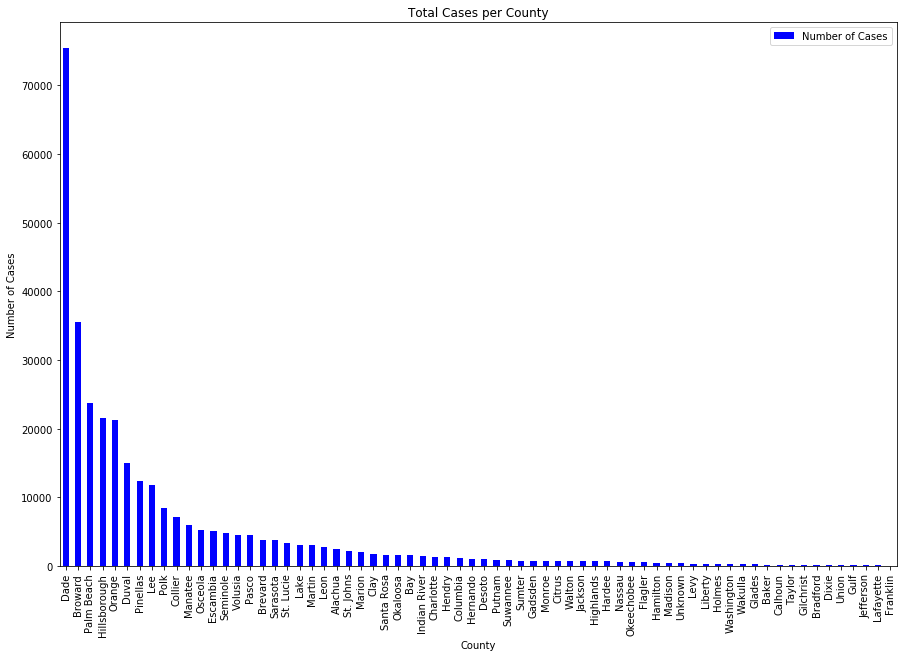

In [18]:
#Create bar chart for total cases per county
total_cases_county.plot(kind='bar',x='County',y='Case1', title ="Total Cases per County", figsize=(15, 10), color="blue")

plt.title("Total Cases per County")
plt.xlabel("County")
plt.ylabel("Number of Cases")
plt.legend(["Number of Cases"])
plt.show()

In [21]:
#Calculate top 10 counties with total cases
top10_county_cases = total_cases_county.sort_values(by="Case1",ascending=False).head(10)
top10_county_cases["Rank"] = np.arange(1,11)
top10_county_cases.set_index("Rank").style.format({"Case1":"{:,}"})

,County,Case1
Rank,,
1,Dade,"75,425"
2,Broward,"35,566"
3,Palm Beach,"23,711"
4,Hillsborough,"21,557"
5,Orange,"21,299"
6,Duval,"14,992"
7,Pinellas,"12,368"
8,Lee,"11,721"
9,Polk,"8,498"


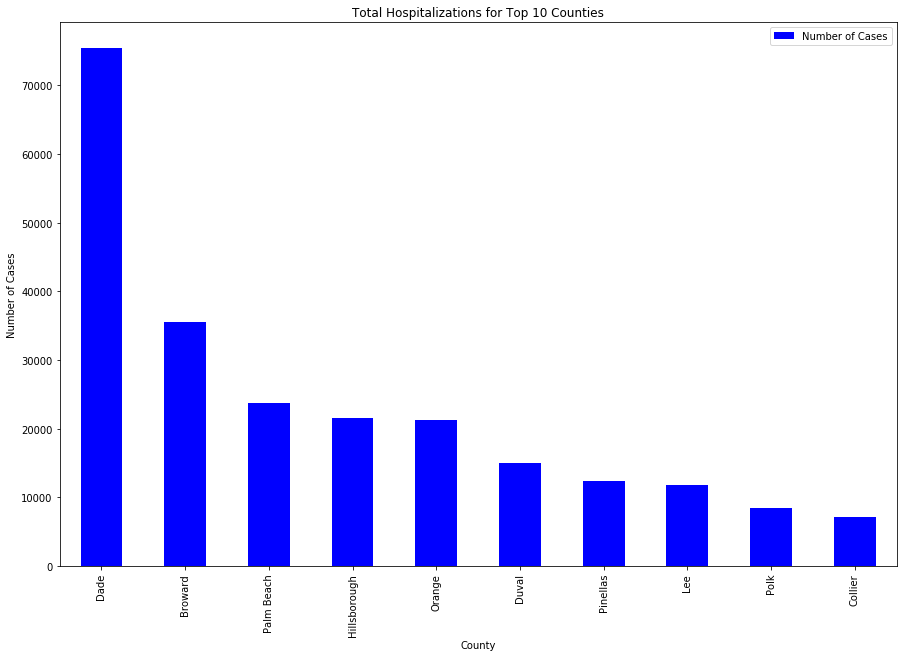

In [22]:
#Create bar chart for top 10 counties with total cases
top10_county_cases.plot(kind='bar',x='County',y='Case1', title ="Total Cases for Top 10 Counties", figsize=(15, 10), color="blue")

plt.title("Total Hospitalizations for Top 10 Counties")
plt.xlabel("County")
plt.ylabel("Number of Cases")
plt.legend(["Number of Cases"])
plt.show()

In [23]:
#Top 10 counties with the most cases

![](Images/top_counties.png)

In [24]:
#Total number of cases by gender
total_cases_gender = new_csv_data_df.groupby(by="Gender").count().reset_index().loc[:,["Gender","Case1"]]
total_cases_gender.rename(columns={"Gender": "Gender", "Case1": "Total Cases"})

,Gender,Total Cases
0,Female,160368
1,Male,153317
2,Unknown,2090


Text(0.5, 1.0, 'Total Number of Cases in Males vs. Females')

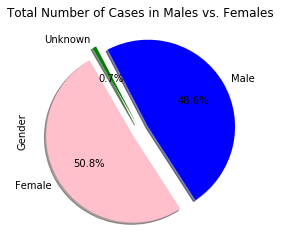

In [25]:
#Create pie chart for total number of cases by gender
total_cases_gender = new_csv_data_df["Gender"].value_counts()

colors=["pink", "blue", "green"]

explode=[0.1,0.1,0.1]

total_cases_gender.plot.pie(explode=explode,colors=colors, autopct="%1.1f%%", shadow=True, subplots=True, startangle=120);

plt.title("Total Number of Cases in Males vs. Females")

In [27]:
#Create dataframe showing only cases with hospitalizations
hosp_filter = new_csv_data_df1["Hospitalized"] == "YES"
hosp_filter_df = new_csv_data_df1[hosp_filter]
hosp_filter_df

,ObjectId,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Hospitalized,Date
11,12600,Broward,59.0,55-64 years,Female,FL resident,No,YES,2020-07-15
13,13705,Escambia,60.0,55-64 years,Male,FL resident,No,YES,2020-07-15
144,33647,Putnam,66.0,65-74 years,Male,FL resident,No,YES,2020-07-15
215,44046,Dade,43.0,35-44 years,Male,FL resident,No,YES,2020-07-15
354,56860,Volusia,66.0,65-74 years,Male,FL resident,No,YES,2020-07-15
...,...,...,...,...,...,...,...,...,...
315764,11932,Lee,77.0,75-84 years,Male,FL resident,Yes,YES,2020-03-07
315765,11933,Broward,65.0,65-74 years,Male,FL resident,Yes,YES,2020-03-07
315766,11936,Santa Rosa,71.0,65-74 years,Male,FL resident,Yes,YES,2020-03-05
315767,11601,Leon,59.0,55-64 years,Female,Not diagnosed/isolated in FL,Yes,YES,2020-03-04


In [28]:
#Total Hospitalized 
hosp_count = hosp_filter_df["Hospitalized"].value_counts()

#Average age of patients hospitalized 
Average_age_hospitalized = hosp_filter_df['Age'].mean()
Median_age_hospitalized = hosp_filter_df['Age'].median()

hosp_age_data_df = pd.DataFrame({"Total Number Hospitalized": hosp_count, 
                      "Average Age": [Average_age_hospitalized], "Median Age": [Median_age_hospitalized]})

hosp_age_data_df["Average Age"] = hosp_age_data_df["Average Age"].map("{0:,.3}years".format)
hosp_age_data_df["Median Age"] = hosp_age_data_df["Median Age"].map("{0:,.3}years".format)
hosp_age_data_df

,Total Number Hospitalized,Average Age,Median Age
YES,20154,62.6years,65.0years


In [29]:
#Percentage of hospitalization by gender # Create Visualization (Libardo)

df = step2.get_df_with_datetime_and_formatted_column()
filt = df['Gender']=='Male'
df = df[filt]
df = step2.get_hospitalizations_by_casedatetime(df)
male_by_week = df.groupby(pd.Grouper(freq='W',key='CaseDateTime')).sum()

df = step2.get_df_with_datetime_and_formatted_column()
filt = df['Gender']=='Female'
df = df[filt]
df = step2.get_hospitalizations_by_casedatetime(df)
female_by_week = df.groupby(pd.Grouper(freq='W',key='CaseDateTime')).sum()

male_perc = male_by_week['Hospitalized']/(male_by_week['Hospitalized']+female_by_week['Hospitalized'])*100
female_perc = female_by_week['Hospitalized']/(male_by_week['Hospitalized']+female_by_week['Hospitalized'])*100

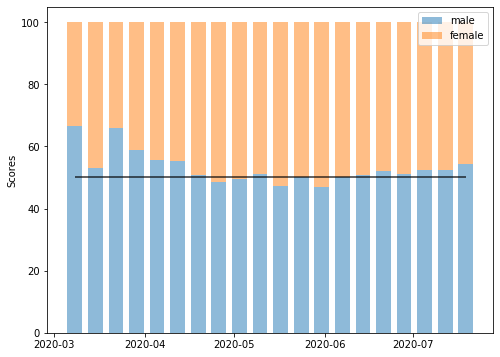

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
p1 = plt.bar(male_perc.index,male_perc,width=5,label='male',alpha=0.5)
p2 = plt.bar(female_perc.index,female_perc,bottom=male_perc,width=5,label='female',alpha=0.5)
plt.hlines(y=50,xmin=male_perc.index[0],xmax=male_perc.index[-1],alpha=0.8)
plt.ylabel('Scores')
plt.legend(handles=[p1,p2])
plt.show()

In [31]:
#Calcalate percentage hospitalized by age group 
#Calculate total hospitalized 
Total_hospitalized = hosp_filter_df["Hospitalized"].count()

#Group by age group and count total hospitalized by age category
demo_age_grouped = hosp_filter_df.groupby("Age_group")
total_hospitalize_count = demo_age_grouped["Hospitalized"].value_counts()

#Calculate percentage by age category
age_percentage = (total_hospitalize_count/Total_hospitalized) * 100

#Create a dataframe for values
Age_demographic_summary = pd.DataFrame({"Total Count": total_hospitalize_count, 
                                          "Percentage of hospitalized patients": age_percentage})
#Remove index name
#Age_demographic_summary.index.name =None

#Format percentage to two decimal places 
Age_demographic_summary["Percentage of hospitalized patients"] = Age_demographic_summary["Percentage of hospitalized patients"].map("{0:,.3}%".format)
Age_demographic_summary

,,Total Count,Percentage of hospitalized patients
Age_group,Hospitalized,,
0-4 years,YES,98,0.486%
15-24 years,YES,497,2.47%
25-34 years,YES,1259,6.25%
35-44 years,YES,1876,9.31%
45-54 years,YES,2696,13.4%
5-14 years,YES,74,0.367%
55-64 years,YES,3544,17.6%
65-74 years,YES,3871,19.2%
75-84 years,YES,3558,17.7%


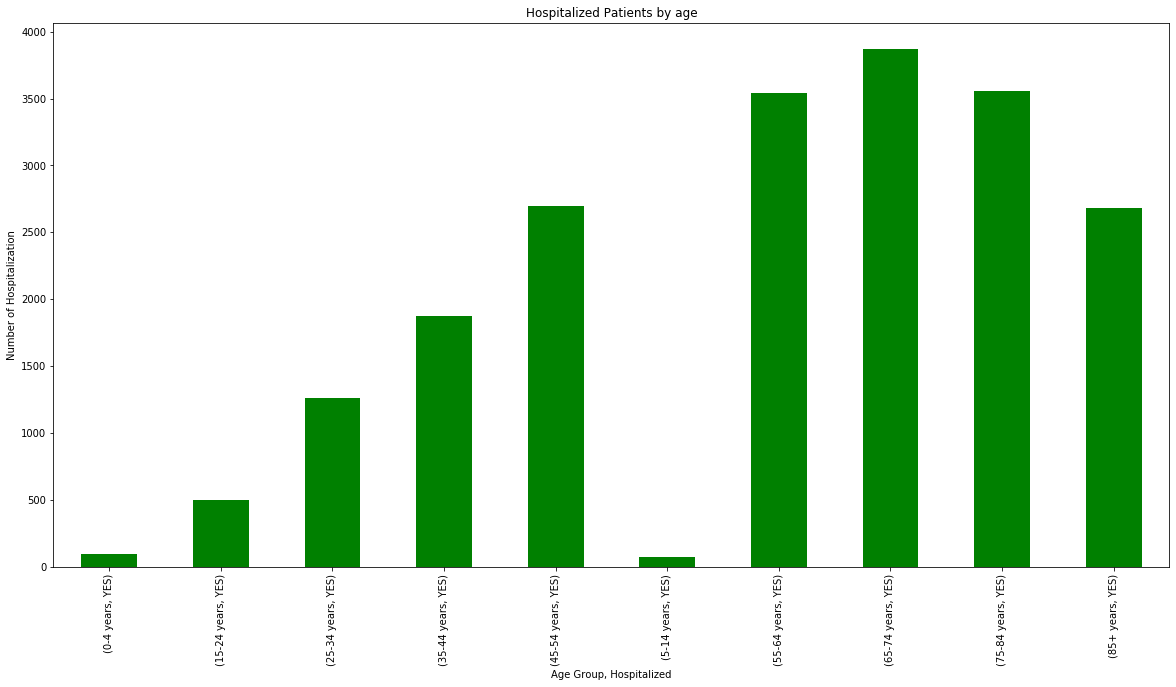

In [32]:
#Hospitalization vs age plot

Age_demographic_summary["Total Count"].plot(kind= "bar", color = "g", figsize=(20, 10))

plt.title("Hospitalized Patients by age")
plt.xlabel("Age Group, Hospitalized")
plt.ylabel("Number of Hospitalization")

plt.show()

TypeError: float() argument must be a string or a number, not 'Timestamp'

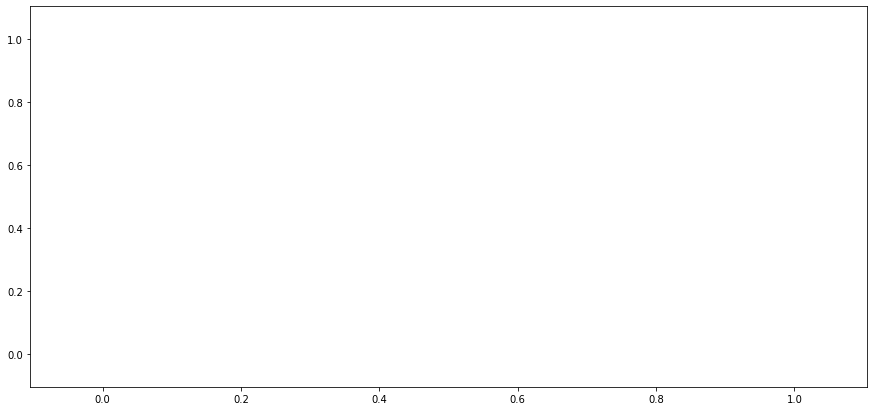

In [34]:
#Create a visualization of hospitalizations by case
import seaborn as sns
new_csv_data_df['Count']=np.where(new_csv_data_df['Hospitalized']=='YES', 1,0)
new_csv_data_df.head()
new_csv_data_df['Count2']=1
new_csv_data_df['Case1']=pd.to_datetime(new_csv_data_df['Case1'])
case_plot_df=pd.DataFrame(new_csv_data_df.groupby(['Hospitalized', pd.Grouper(key='Case1', freq='W')])['Count2'].count())
case_plot_df.reset_index(inplace=True)
plt.subplots(figsize=[15,7])
sns.lineplot(x='Case1', y='Count2', data=case_plot_df, hue='Hospitalized')
plt.xticks(rotation=45)

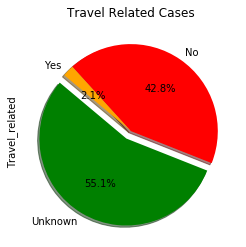

In [35]:
#Compare travel-related cases to non-travel-related cases (Not done yet) (Chika)
travel_vs_nontravel = new_csv_data_df1["Travel_related"].value_counts()
#travel_vs_nontravel

colors = ['green', 'red', 'orange']
explode = (0.1, 0, 0)
travel_vs_nontravel.plot(kind="pie", colors= colors, explode= explode, startangle=140, shadow = True, autopct='%1.1f%%')
plt.title("Travel Related Cases")
plt.show()

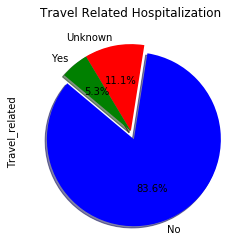

In [36]:
#Compare travel-related hospitalization to non-travel-related hospitalization (Not done yet) (Chika)
travel_vs_nontravel_hosp = hosp_filter_df["Travel_related"].value_counts()

#Plottravel_vs_nontravel

colors = ['blue', 'red', 'green']
explode = (0.1, 0, 0)
travel_vs_nontravel_hosp.plot(kind="pie", colors= colors, explode= explode, startangle=140, shadow = True, autopct='%1.1f%%')
plt.title("Travel Related Hospitalization")
plt.show()

In [37]:
#Create new dataframe for date and hospitalization
sec_hosp_data_df = hosp_filter_df.filter(["County",'Hospitalized', "Age", "Age_group", "Gender", 'Date'], axis=1)
sec_hosp_data_df

,County,Hospitalized,Age,Age_group,Gender,Date
11,Broward,YES,59.0,55-64 years,Female,2020-07-15
13,Escambia,YES,60.0,55-64 years,Male,2020-07-15
144,Putnam,YES,66.0,65-74 years,Male,2020-07-15
215,Dade,YES,43.0,35-44 years,Male,2020-07-15
354,Volusia,YES,66.0,65-74 years,Male,2020-07-15
...,...,...,...,...,...,...
315764,Lee,YES,77.0,75-84 years,Male,2020-03-07
315765,Broward,YES,65.0,65-74 years,Male,2020-03-07
315766,Santa Rosa,YES,71.0,65-74 years,Male,2020-03-05
315767,Leon,YES,59.0,55-64 years,Female,2020-03-04


In [38]:
#Divide hospitalization case date data in two groups of data 
#prior to reopening and after reopening and create new dataframe (Kurt) consider total (Chika)

#Convert Date to datetime 

sec_hosp_data_df['Date'] = pd.to_datetime(sec_hosp_data_df["Date"], format ="%Y-%m-%d")

Before_start_date = "2020-01-01"
Before_end_date = '2020-05-03'

mask = (sec_hosp_data_df['Date'] > Before_start_date) & (sec_hosp_data_df['Date'] <= Before_end_date)

hosp_filter_df_new = sec_hosp_data_df.loc[mask]
hosp_filter_df_new.head(10)

,County,Hospitalized,Age,Age_group,Gender,Date
279167,Hillsborough,YES,75.0,75-84 years,Female,2020-05-03
279168,Polk,YES,74.0,65-74 years,Male,2020-05-03
279171,Hillsborough,YES,68.0,65-74 years,Female,2020-05-03
279172,Dade,YES,87.0,85+ years,Male,2020-05-03
279173,Broward,YES,69.0,65-74 years,Male,2020-05-03
279174,Hillsborough,YES,68.0,65-74 years,Female,2020-05-03
279176,Collier,YES,88.0,85+ years,Female,2020-05-03
279179,Alachua,YES,45.0,45-54 years,Female,2020-05-03
279185,Broward,YES,85.0,85+ years,Male,2020-05-03
279187,Dade,YES,72.0,65-74 years,Male,2020-05-03


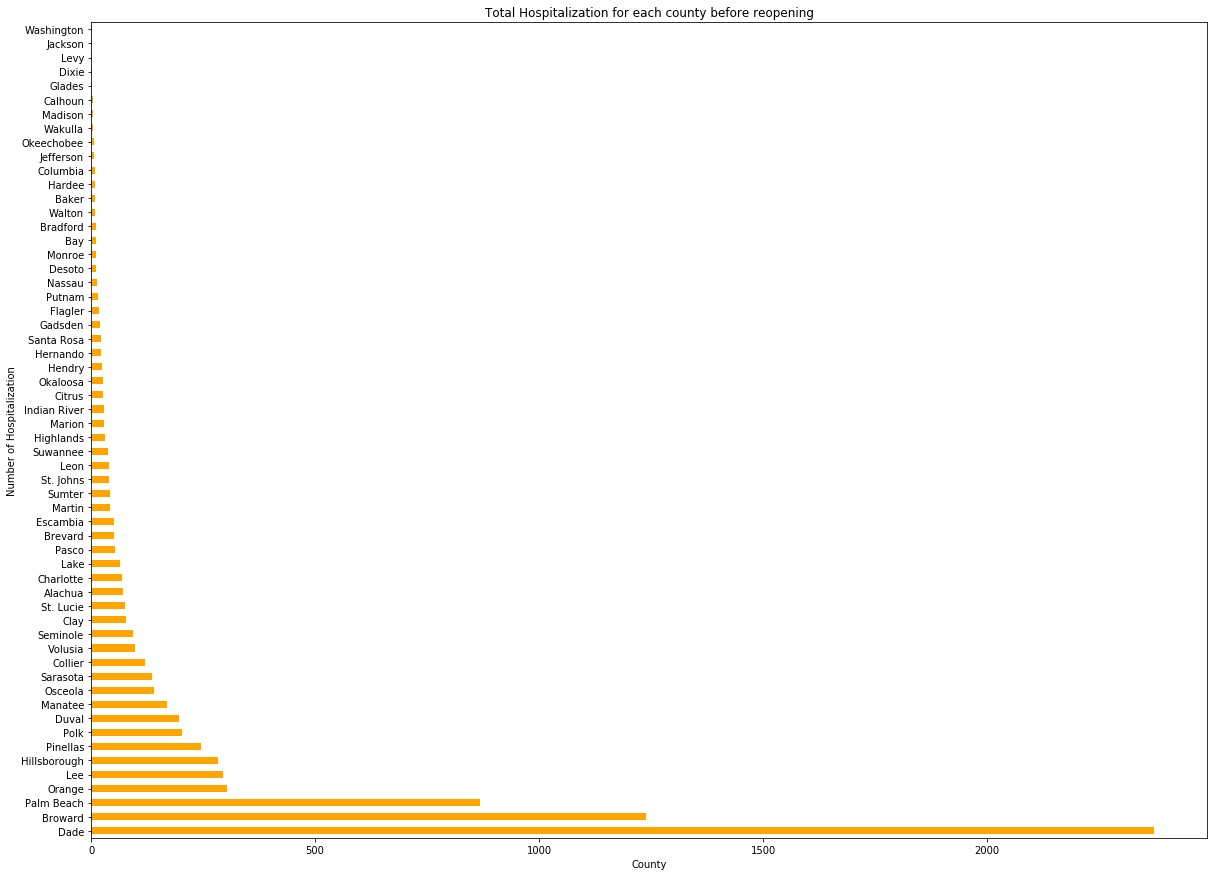

In [41]:
#Calculate hospitalization per county for before reopening and plot chart

my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']  # red, green, blue, black, etc.
my_colormap = ListedColormap(my_colors)

Before_hosp_county = hosp_filter_df_new["County"].value_counts().plot(kind= "barh", color = 'orange', figsize=(20, 15))

#chart title
plt.title("Total Hospitalization for each county before reopening")
plt.xlabel("County")
plt.ylabel("Number of Hospitalization")

plt.show()

In [ ]:
hosp_filter_df_new['Date'] = pd.to_datetime(hosp_filter_df_new['Date'], errors='coerce')
hosp_filter_df_new['Case_Date'] = hosp_filter_df_new["Date"].dt.strftime("%m")
hosp_filter_df_new

In [44]:
#Divide hospitalization case date data in two groups of data prior to reopening and after reopening and create new dataframe

#Convert Date to datetime 

sec_hosp_data_df['Date'] = pd.to_datetime(sec_hosp_data_df["Date"], format ="%Y-%m-%d")

After_start_date = "2020-05-04"
After_end_date = '2020-07-15'

mask = (sec_hosp_data_df['Date'] > After_start_date) & (sec_hosp_data_df['Date'] <= After_end_date)

hosp_filter_df_new1 = sec_hosp_data_df.loc[mask]
hosp_filter_df_new1

,County,Hospitalized,Age,Age_group,Gender,Date
11,Broward,YES,59.0,55-64 years,Female,2020-07-15
13,Escambia,YES,60.0,55-64 years,Male,2020-07-15
144,Putnam,YES,66.0,65-74 years,Male,2020-07-15
215,Dade,YES,43.0,35-44 years,Male,2020-07-15
354,Volusia,YES,66.0,65-74 years,Male,2020-07-15
...,...,...,...,...,...,...
278541,Dade,YES,85.0,85+ years,Female,2020-05-05
278542,Dade,YES,92.0,85+ years,Male,2020-05-05
278545,Dade,YES,81.0,75-84 years,Male,2020-05-05
278573,Lee,YES,72.0,65-74 years,Male,2020-05-05


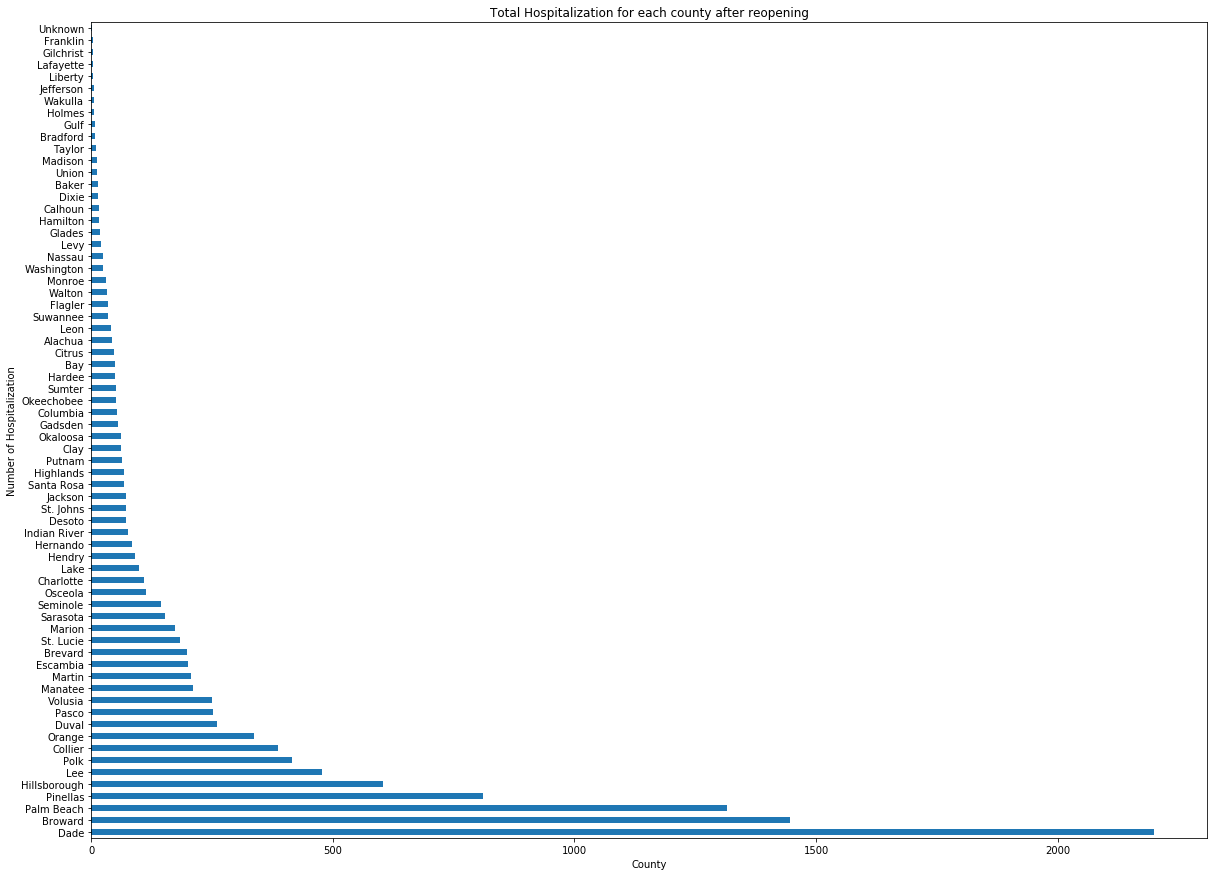

In [45]:
#Calculate hospitalization per county for after reopening 

#my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']  # red, green, blue, black, etc.
#my_colormap = ListedColormap(my_colors)

After_hosp_county = hosp_filter_df_new1["County"].value_counts().plot(kind= "barh", figsize=(20, 15))

#chart title
plt.title("Total Hospitalization for each county after reopening")
plt.xlabel("County")
plt.ylabel("Number of Hospitalization")

plt.show()

In [46]:
#Average age of patients hospitalized before shut down

Avg_hosp_count = hosp_filter_df_new["Hospitalized"].value_counts()

#Average age of patients hospitalized 
Average_age_new_df = hosp_filter_df_new['Age'].mean()
Median_age_new_df = hosp_filter_df_new['Age'].median()

hosp_age_new_df = pd.DataFrame({"Total Hospitalized Before Reopening": Avg_hosp_count, 
                      "Average Age": [Average_age_new_df], "Median Age": [Median_age_new_df]})

hosp_age_new_df["Average Age"] = hosp_age_new_df["Average Age"].map("{0:,.3}years".format)
hosp_age_new_df["Median Age"] = hosp_age_new_df["Median Age"].map("{0:,.3}years".format)
hosp_age_new_df

,Total Hospitalized Before Reopening,Average Age,Median Age
YES,7865,64.7years,67.0years


In [47]:
#Average age of patients hospitalized after reopening

Avg_hosp_count1 = hosp_filter_df_new1["Hospitalized"].value_counts()

#Average age of patients hospitalized 
Average_age_new_df1 = hosp_filter_df_new1['Age'].mean()
Median_age_new_df1 = hosp_filter_df_new1['Age'].median()


hosp_age_new_df1 = pd.DataFrame({"Total Hospitalized After Reopening": Avg_hosp_count1, 
                      "Average Age": [Average_age_new_df1], "Median Age": [Median_age_new_df1]})

hosp_age_new_df1["Average Age"] = hosp_age_new_df1["Average Age"].map("{0:,.3}years".format)
hosp_age_new_df1["Median Age"] = hosp_age_new_df1["Median Age"].map("{0:,.3}years".format)
hosp_age_new_df1

,Total Hospitalized After Reopening,Average Age,Median Age
YES,12158,61.2years,63.0years


# Conclusions